In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
earthquake = pd.read_csv('database.csv')
print(earthquake.head())

         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

In [3]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

Some of the columns can be eliminated as they have higher number of Null values and do not add value for the analysis

Columns such as Magnitude Error, Magnitude Seismic Stations, Azimuthal Gap, Horizontal Distance, Horizontal Error, Root Mean Square Error can be removed from analysis

In [4]:
earthquake.drop(['Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square'], axis = 1, inplace= True)

In [5]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    23412 non-null  object 
 1   Time                    23412 non-null  object 
 2   Latitude                23412 non-null  float64
 3   Longitude               23412 non-null  float64
 4   Type                    23412 non-null  object 
 5   Depth                   23412 non-null  float64
 6   Depth Error             4461 non-null   float64
 7   Depth Seismic Stations  7097 non-null   float64
 8   Magnitude               23412 non-null  float64
 9   Magnitude Type          23409 non-null  object 
 10  ID                      23412 non-null  object 
 11  Source                  23412 non-null  object 
 12  Location Source         23412 non-null  object 
 13  Magnitude Source        23412 non-null  object 
 14  Status                  23412 non-null

Almost all columns are removed. It seems there are two more columns Depth Error and Depth Seismic Stations need to be dropped as well

In [6]:
earthquake.drop(['Depth Error', 'Depth Seismic Stations'], axis=1, inplace= True)

In [7]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   ID                23412 non-null  object 
 9   Source            23412 non-null  object 
 10  Location Source   23412 non-null  object 
 11  Magnitude Source  23412 non-null  object 
 12  Status            23412 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.3+ MB


In [8]:
earthquake['Magnitude Type'].value_counts()


Magnitude Type
MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: count, dtype: int64

In [9]:
earthquake[earthquake['Magnitude Type'].isna()]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
6703,08/24/1983,13:36:00,40.3732,-124.9227,Earthquake,11.93,5.70,NaN,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic
7294,11/23/1984,18:08:00,37.4600,-118.5900,Earthquake,9.00,5.82,NaN,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic
7919,03/31/1986,11:55:00,37.4788,-121.6858,Earthquake,9.17,5.60,NaN,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic


In [10]:
earthquake.loc[6703, 'Magnitude Type'] = "MW"
earthquake.loc[7294, 'Magnitude Type'] = "MW"
earthquake.loc[7919, 'Magnitude Type'] = "MW"

In [11]:
earthquake['Magnitude Type'].isna().value_counts()

Magnitude Type
False    23412
Name: count, dtype: int64

Above output show there are no null values at all in the Magnitude Type column

# Data cleaning

### Handling dates

In [12]:
earthquake['Date'].head(20)

0     01/02/1965
1     01/04/1965
2     01/05/1965
3     01/08/1965
4     01/09/1965
5     01/10/1965
6     01/12/1965
7     01/15/1965
8     01/16/1965
9     01/17/1965
10    01/17/1965
11    01/24/1965
12    01/29/1965
13    02/01/1965
14    02/02/1965
15    02/04/1965
16    02/04/1965
17    02/04/1965
18    02/04/1965
19    02/04/1965
Name: Date, dtype: object

It seems there is a mix in the date format %d/%m/%Y and %m/%d/%Y

In [13]:
pd.to_datetime(earthquake['Date'])

ValueError: time data "1975-02-23T02:58:41.000Z" doesn't match format "%m/%d/%Y", at position 2095. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

It seems there is another date format along with time stamp. There seems to be a way of handling all date type using some parameters in the to_datetime method.

In [14]:
earthquake['Date'].str.len().value_counts()

Date
10    23409
24        3
Name: count, dtype: int64

It seems that there are three dates with time stamp 

In [15]:
earthquake[earthquake['Date'].str.len()==24]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,USP000HWQP,US,US,GCMT,Reviewed


Filtering by lenght of date gives the three dates

In [16]:
earthquake.loc[3378, 'Date'] = '23/02/1975'
earthquake.loc[7512, 'Date'] = '28/04/1985'
earthquake.loc[20650, 'Date'] = '13/03/2011'

No we have changed all dates to equal length by removing timestamp. We can check it as follows

In [17]:
earthquake['Date'].str.len().value_counts()

Date
10    23412
Name: count, dtype: int64

Above output confirms all dates are of equal length

In [18]:
pd.to_datetime(earthquake['Date'], format= 'mixed')

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: Date, Length: 23412, dtype: datetime64[ns]

So changing dates after ensuring all dates in the Date column are equal length ensure successful conversion of data type to datetime

In [19]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23412 non-null  object 
 8   ID                23412 non-null  object 
 9   Source            23412 non-null  object 
 10  Location Source   23412 non-null  object 
 11  Magnitude Source  23412 non-null  object 
 12  Status            23412 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.3+ MB


Above output shows data type is still not change. We need to assign it to column to make sure data type change is reflected

In [20]:
earthquake['Date'] = pd.to_datetime(earthquake['Date'], format= 'mixed')

In [21]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              23412 non-null  datetime64[ns]
 1   Time              23412 non-null  object        
 2   Latitude          23412 non-null  float64       
 3   Longitude         23412 non-null  float64       
 4   Type              23412 non-null  object        
 5   Depth             23412 non-null  float64       
 6   Magnitude         23412 non-null  float64       
 7   Magnitude Type    23412 non-null  object        
 8   ID                23412 non-null  object        
 9   Source            23412 non-null  object        
 10  Location Source   23412 non-null  object        
 11  Magnitude Source  23412 non-null  object        
 12  Status            23412 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 2.3+ MB


In [22]:
earthquake['Time'].head()

0    13:44:18
1    11:29:49
2    18:05:58
3    18:49:43
4    13:32:50
Name: Time, dtype: object

In [23]:
import datetime
earthquake['Time'].dt.hour

AttributeError: Can only use .dt accessor with datetimelike values

We can't extract date from an object data type. So, we need to convert it to date dtype

In [24]:
pd.to_datetime(earthquake['Time'])

C:\Users\Owner\AppData\Local\Temp\ipykernel_19140\2030688786.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(earthquake['Time'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_19140\2030688786.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  pd.to_datetime(earthquake['Time'])


0        2025-02-15 13:44:18
1        2025-02-15 11:29:49
2        2025-02-15 18:05:58
3        2025-02-15 18:49:43
4        2025-02-15 13:32:50
                ...         
23407    2025-02-15 08:22:12
23408    2025-02-15 09:13:47
23409    2025-02-15 12:38:51
23410    2025-02-15 22:30:19
23411    2025-02-15 20:08:28
Name: Time, Length: 23412, dtype: object

Tried to convert it into date time type but still the column in of Object dtype. It seems there are some rows which are having different format and impacted conversion of overall column

We can check the outliers in the data by using len() method as it is an object data type

In [25]:
earthquake['Time'].str.len().value_counts()

Time
8     23409
24        3
Name: count, dtype: int64

There are 3 row elements which have more length of remaining rows. We can check them by filtering them in the data frame as follows

In [26]:
earthquake[earthquake['Time'].str.len()==24]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,USP0000A09,US,US,US,Reviewed
7512,1985-04-28,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,USP000HWQP,US,US,GCMT,Reviewed


In [27]:
earthquake.loc[3378,'Time'] = '02:58:41'
earthquake.loc[7512,'Time'] = '02:53:41'
earthquake.loc[20650,'Time'] = '02:23:34'

Now we can execute conversion of data type of the column

In [28]:
pd.to_datetime(earthquake['Time'])

C:\Users\Owner\AppData\Local\Temp\ipykernel_19140\2030688786.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(earthquake['Time'])


0       2025-02-15 13:44:18
1       2025-02-15 11:29:49
2       2025-02-15 18:05:58
3       2025-02-15 18:49:43
4       2025-02-15 13:32:50
                ...        
23407   2025-02-15 08:22:12
23408   2025-02-15 09:13:47
23409   2025-02-15 12:38:51
23410   2025-02-15 22:30:19
23411   2025-02-15 20:08:28
Name: Time, Length: 23412, dtype: datetime64[ns]

Seeing the output we can see today date but it can be ignored as our primary need is to extract specific times in a day

In [29]:
earthquake['Time'] = pd.to_datetime(earthquake['Time'])

C:\Users\Owner\AppData\Local\Temp\ipykernel_19140\221252963.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earthquake['Time'] = pd.to_datetime(earthquake['Time'])


In [30]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              23412 non-null  datetime64[ns]
 1   Time              23412 non-null  datetime64[ns]
 2   Latitude          23412 non-null  float64       
 3   Longitude         23412 non-null  float64       
 4   Type              23412 non-null  object        
 5   Depth             23412 non-null  float64       
 6   Magnitude         23412 non-null  float64       
 7   Magnitude Type    23412 non-null  object        
 8   ID                23412 non-null  object        
 9   Source            23412 non-null  object        
 10  Location Source   23412 non-null  object        
 11  Magnitude Source  23412 non-null  object        
 12  Status            23412 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 2.3+ MB


In [31]:
earthquake['Type'].value_counts()

Type
Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: count, dtype: int64

In [32]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Hazards and their frequency of occurance')

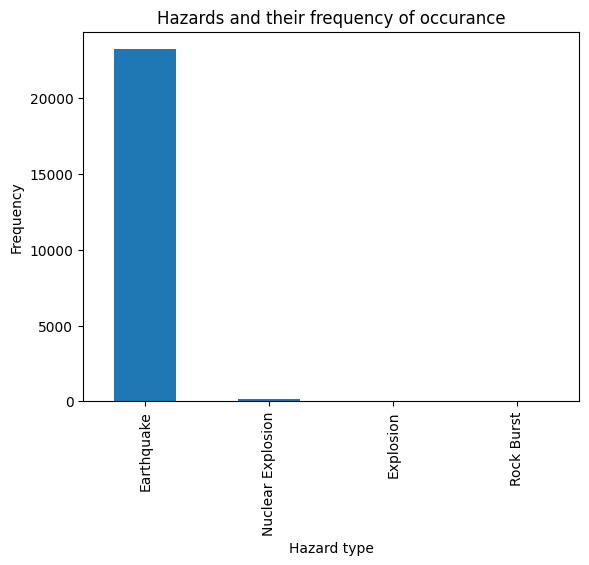

In [33]:
earthquake['Type'].value_counts().plot(kind = 'bar')
# plt.plot(earthquake['Type'].value_counts())
plt.xlabel("Hazard type")
plt.ylabel("Frequency")
plt.title("Hazards and their frequency of occurance")


We cannot see other types apart from earthquakes as they have occured very less. We can filter data set to earthquake to further analyse earthquakes and its types

In [34]:
earthquake['ID'].value_counts()

ID
US10007NTD         1
ISCGEM860706       1
ISCGEM860737       1
ISCGEM860762       1
US200082PP         1
                  ..
ISCGEMSUP861125    1
ISCGEM861111       1
ISCGEM861007       1
ISCGEM860922       1
ISCGEM860890       1
Name: count, Length: 23412, dtype: int64

It seems id is unique and we don't need it for analysis. So, we can drop Id column as well

In [35]:
earthquake.drop('ID', axis=1, inplace = True)

In [36]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              23412 non-null  datetime64[ns]
 1   Time              23412 non-null  datetime64[ns]
 2   Latitude          23412 non-null  float64       
 3   Longitude         23412 non-null  float64       
 4   Type              23412 non-null  object        
 5   Depth             23412 non-null  float64       
 6   Magnitude         23412 non-null  float64       
 7   Magnitude Type    23412 non-null  object        
 8   Source            23412 non-null  object        
 9   Location Source   23412 non-null  object        
 10  Magnitude Source  23412 non-null  object        
 11  Status            23412 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 2.1+ MB


In [37]:
earthquake['Source'].value_counts()

Source
US           20630
ISCGEM        2460
ISCGEMSUP      120
CI              61
GCMT            55
NC              51
AK              12
OFFICIAL         8
UW               6
NN               4
ATLAS            3
SE               1
PR               1
Name: count, dtype: int64

In [38]:
earthquake['Location Source'].value_counts()

Location Source
US        20350
ISCGEM     2581
CI           61
GCMT         56
NC           54
GUC          46
AEIC         40
UNM          21
PGC          19
WEL          18
AGS          17
ISK          15
AK           14
ATH          14
HVO          12
SPE          10
ROM           7
AEI           7
TEH           7
H             7
UW            6
US_WEL        4
NN            4
CASC          4
RSPR          3
THR           3
THE           3
JMA           3
ATLAS         3
G             2
MDD           2
B             2
TUL           2
BRK           1
U             1
AG            1
CSEM          1
OTT           1
BOU           1
SLC           1
UCR           1
BEO           1
SJA           1
CAR           1
TAP           1
SE            1
LIM           1
PR            1
Name: count, dtype: int64

In [39]:
earthquake['Magnitude Source'].value_counts()

Magnitude Source
US          10458
HRV          8223
ISCGEM       2580
GCMT         1489
NC            533
CI             61
AK             12
PAR             9
OFFICIAL        8
GUC             6
UW              6
NIED            4
NN              4
ATLAS           3
1000            3
US_GCMT         3
PGC             2
BRK             2
1020            1
1023            1
1009            1
SE              1
US_PGC          1
PR              1
Name: count, dtype: int64

It seems source and location source columns have similar values. We will try to analyse for 'US' as it has significant data points

In [40]:
earthquake['Status'].value_counts()

Status
Reviewed     20773
Automatic     2639
Name: count, dtype: int64

In [41]:
earthquake[earthquake['Status']=='Automatic']['Location Source'].value_counts()

Location Source
ISCGEM    2581
GCMT        55
ATLAS        3
Name: count, dtype: int64

It seems Status for all data related to US is reviewed. So, when we filter to 'US' location source we can drop status column as well

In [42]:
earthquake[earthquake['Location Source']== 'US']

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Source,Location Source,Magnitude Source,Status
2575,1973-01-01,2025-02-15 11:42:37,-35.5130,-16.2110,Earthquake,33.00,6.0,MS,US,US,US,Reviewed
2576,1973-01-02,2025-02-15 00:53:20,-9.8540,117.4270,Earthquake,66.00,5.5,MB,US,US,US,Reviewed
2577,1973-01-03,2025-02-15 02:58:17,-27.7160,-63.2610,Earthquake,563.00,5.6,MB,US,US,US,Reviewed
2578,1973-01-03,2025-02-15 14:31:05,39.1140,71.8890,Earthquake,33.00,5.5,MB,US,US,US,Reviewed
2579,1973-01-05,2025-02-15 13:54:29,-38.9970,175.2320,Earthquake,150.00,6.2,MB,US,US,US,Reviewed
...,...,...,...,...,...,...,...,...,...,...,...,...
23404,2016-12-25,2025-02-15 14:32:13,-43.4810,-74.4771,Earthquake,14.93,5.6,MB,US,US,US,Reviewed
23405,2016-12-27,2025-02-15 23:20:56,45.7192,26.5230,Earthquake,97.00,5.6,MWW,US,US,US,Reviewed
23409,2016-12-28,2025-02-15 12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US,US,US,Reviewed
23410,2016-12-29,2025-02-15 22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US,US,US,Reviewed


In [43]:
earthquake_usdata = earthquake[earthquake['Location Source']== 'US']
earthquake_usdata.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Source,Location Source,Magnitude Source,Status
2575,1973-01-01,2025-02-15 11:42:37,-35.513,-16.211,Earthquake,33.0,6.0,MS,US,US,US,Reviewed
2576,1973-01-02,2025-02-15 00:53:20,-9.854,117.427,Earthquake,66.0,5.5,MB,US,US,US,Reviewed
2577,1973-01-03,2025-02-15 02:58:17,-27.716,-63.261,Earthquake,563.0,5.6,MB,US,US,US,Reviewed
2578,1973-01-03,2025-02-15 14:31:05,39.114,71.889,Earthquake,33.0,5.5,MB,US,US,US,Reviewed
2579,1973-01-05,2025-02-15 13:54:29,-38.997,175.232,Earthquake,150.0,6.2,MB,US,US,US,Reviewed


In [44]:
earthquake_usdata['Source'].value_counts()

Source
US          20343
OFFICIAL        7
Name: count, dtype: int64

In [45]:
earthquake_usdata['Location Source'].value_counts()

Location Source
US    20350
Name: count, dtype: int64

After reviewing Source and Location Source columns it is clear that 'OFFICIAL' rows is same as 'US' we can replace them or drop the column as both of them represent the same data

In [46]:
earthquake_usdata.drop('Source', axis=1, inplace =True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_19140\3609644838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_usdata.drop('Source', axis=1, inplace =True)


In [47]:
earthquake_usdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20350 entries, 2575 to 23411
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              20350 non-null  datetime64[ns]
 1   Time              20350 non-null  datetime64[ns]
 2   Latitude          20350 non-null  float64       
 3   Longitude         20350 non-null  float64       
 4   Type              20350 non-null  object        
 5   Depth             20350 non-null  float64       
 6   Magnitude         20350 non-null  float64       
 7   Magnitude Type    20350 non-null  object        
 8   Location Source   20350 non-null  object        
 9   Magnitude Source  20350 non-null  object        
 10  Status            20350 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 1.9+ MB


In [48]:
earthquake_usdata['Magnitude Source'].value_counts()

Magnitude Source
US          10306
HRV          8148
GCMT         1383
NC            477
PAR             9
OFFICIAL        7
GUC             6
NIED            3
US_GCMT         3
PGC             2
1000            2
1023            1
BRK             1
1020            1
US_PGC          1
Name: count, dtype: int64

As mentioned above we can assume 'OFFICIAL' is same as 'US'

In [49]:
earthquake_usdata[earthquake_usdata['Magnitude Source'] == 'OFFICIAL']

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Location Source,Magnitude Source,Status
15440,2001-06-23,2025-02-15 20:33:14,-16.265,-73.641,Earthquake,33.0,8.4,MWW,US,OFFICIAL,Reviewed
17083,2004-12-26,2025-02-15 00:58:53,3.295,95.982,Earthquake,30.0,9.1,MW,US,OFFICIAL,Reviewed
17329,2005-03-28,2025-02-15 16:09:37,2.085,97.108,Earthquake,30.0,8.6,MWW,US,OFFICIAL,Reviewed
18615,2007-09-12,2025-02-15 11:10:27,-4.438,101.367,Earthquake,34.0,8.4,MWW,US,OFFICIAL,Reviewed
19928,2010-02-27,2025-02-15 06:34:12,-36.122,-72.898,Earthquake,22.9,8.8,MWW,US,OFFICIAL,Reviewed
20501,2011-03-11,2025-02-15 05:46:24,38.297,142.373,Earthquake,29.0,9.1,MWW,US,OFFICIAL,Reviewed
21219,2012-04-11,2025-02-15 08:38:37,2.327,93.063,Earthquake,20.0,8.6,MW,US,OFFICIAL,Reviewed


In [50]:
earthquake_usdata.loc[earthquake_usdata['Magnitude Source']=='OFFICIAL', 'Magnitude Source'] = "US"

I tried to filter rows based on row value 'OFFICIAL' and replaced it with 'US'

In [51]:
earthquake_usdata['Magnitude Source'].value_counts()

Magnitude Source
US         10313
HRV         8148
GCMT        1383
NC           477
PAR            9
GUC            6
NIED           3
US_GCMT        3
PGC            2
1000           2
1023           1
BRK            1
1020           1
US_PGC         1
Name: count, dtype: int64

Above information shows I have successfully replaced data with 'OFFICIAL' name to 'US'.

On observing above data it shows some of categorical values seems in appropriate such as 1020,1000,1023 as well as short form PAR, GUC, NIED..etc., 

As they represent very small proportion of data I am removing them

In [52]:
earthquake_usdata[earthquake_usdata['Magnitude Source'].isin(['US', 'HRV', 'GCMT', 'NC' ])]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Location Source,Magnitude Source,Status
2575,1973-01-01,2025-02-15 11:42:37,-35.5130,-16.2110,Earthquake,33.00,6.0,MS,US,US,Reviewed
2576,1973-01-02,2025-02-15 00:53:20,-9.8540,117.4270,Earthquake,66.00,5.5,MB,US,US,Reviewed
2577,1973-01-03,2025-02-15 02:58:17,-27.7160,-63.2610,Earthquake,563.00,5.6,MB,US,US,Reviewed
2578,1973-01-03,2025-02-15 14:31:05,39.1140,71.8890,Earthquake,33.00,5.5,MB,US,US,Reviewed
2579,1973-01-05,2025-02-15 13:54:29,-38.9970,175.2320,Earthquake,150.00,6.2,MB,US,US,Reviewed
...,...,...,...,...,...,...,...,...,...,...,...
23404,2016-12-25,2025-02-15 14:32:13,-43.4810,-74.4771,Earthquake,14.93,5.6,MB,US,US,Reviewed
23405,2016-12-27,2025-02-15 23:20:56,45.7192,26.5230,Earthquake,97.00,5.6,MWW,US,US,Reviewed
23409,2016-12-28,2025-02-15 12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US,US,Reviewed
23410,2016-12-29,2025-02-15 22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US,US,Reviewed


In [53]:
earthquake_usdata_filtered = earthquake_usdata[earthquake_usdata['Magnitude Source'].isin(['US', 'HRV', 'GCMT', 'NC' ])]

In [54]:
earthquake_usdata_filtered['Magnitude Source'].value_counts()

Magnitude Source
US      10313
HRV      8148
GCMT     1383
NC        477
Name: count, dtype: int64

We have finally filtered data according to my need

In [55]:
earthquake_usdata_filtered.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Location Source,Magnitude Source,Status
2575,1973-01-01,2025-02-15 11:42:37,-35.513,-16.211,Earthquake,33.0,6.0,MS,US,US,Reviewed
2576,1973-01-02,2025-02-15 00:53:20,-9.854,117.427,Earthquake,66.0,5.5,MB,US,US,Reviewed
2577,1973-01-03,2025-02-15 02:58:17,-27.716,-63.261,Earthquake,563.0,5.6,MB,US,US,Reviewed
2578,1973-01-03,2025-02-15 14:31:05,39.114,71.889,Earthquake,33.0,5.5,MB,US,US,Reviewed
2579,1973-01-05,2025-02-15 13:54:29,-38.997,175.232,Earthquake,150.0,6.2,MB,US,US,Reviewed


In [56]:
earthquake_usdata_filtered['Magnitude Type'].value_counts()

Magnitude Type
MWC    5499
MW     5054
MB     3726
MWB    2416
MWW    1930
MS     1687
MWR       9
Name: count, dtype: int64

Text(0, 0.5, 'Frequency of occurance')

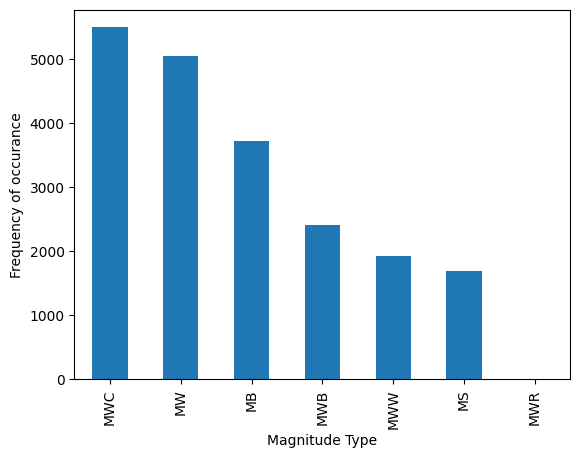

In [57]:
earthquake_usdata_filtered['Magnitude Type'].value_counts().plot(kind = 'bar')
plt.xlabel("Magnitude Type")
plt.ylabel("Frequency of occurance")

Text(0, 0.5, 'Frequency of occurance')

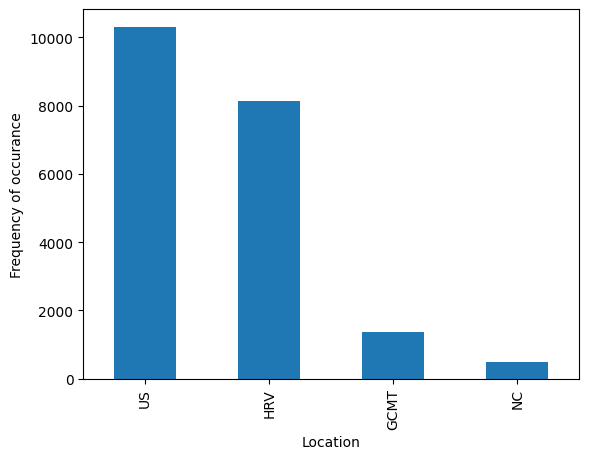

In [58]:
earthquake_usdata_filtered['Magnitude Source'].value_counts().plot(kind = 'bar')
plt.xlabel("Location")
plt.ylabel("Frequency of occurance")

Within location source 'US' we can see the occurance of magnitude source within US. 

Within US, it was mmentioned HRV, GCMT, NC which are other places within US